<a href="https://colab.research.google.com/github/tpiedrahita-byte/sys2025/blob/main/cuaderno_1_teoria_de_se%C3%B1ales_tpj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

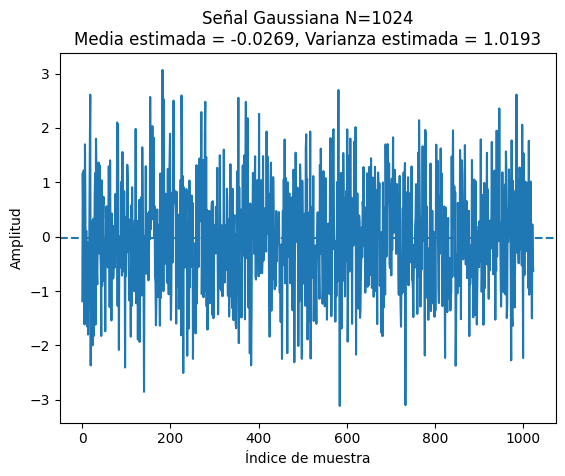

Media estimada: -0.026916231960058212
Varianza estimada: 1.0192811489105225


In [1]:
import torch
import matplotlib.pyplot as plt

# ---------------------------------
# 1. Parámetros de la señal
# ---------------------------------
N = 1024
media_teorica = 0
varianza_teorica = 1

# ---------------------------------
# 2. Generación de la señal gaussiana
# torch.randn genera N(0,1)
# ---------------------------------
senal = torch.randn(N)

# ---------------------------------
# 3. Cálculo de media y varianza estimadas
# ---------------------------------
media_estimada = torch.mean(senal).item()
varianza_estimada = torch.var(senal, unbiased=True).item()

# ---------------------------------
# 4. Representación gráfica
# ---------------------------------
plt.figure()
plt.plot(senal.numpy())
plt.axhline(media_estimada, linestyle='--')
plt.title(f"Señal Gaussiana N=1024\n"
          f"Media estimada = {media_estimada:.4f}, "
          f"Varianza estimada = {varianza_estimada:.4f}")
plt.xlabel("Índice de muestra")
plt.ylabel("Amplitud")
plt.show()

# ---------------------------------
# 5. Mostrar resultados en consola
# ---------------------------------
print("Media estimada:", media_estimada)
print("Varianza estimada:", varianza_estimada)

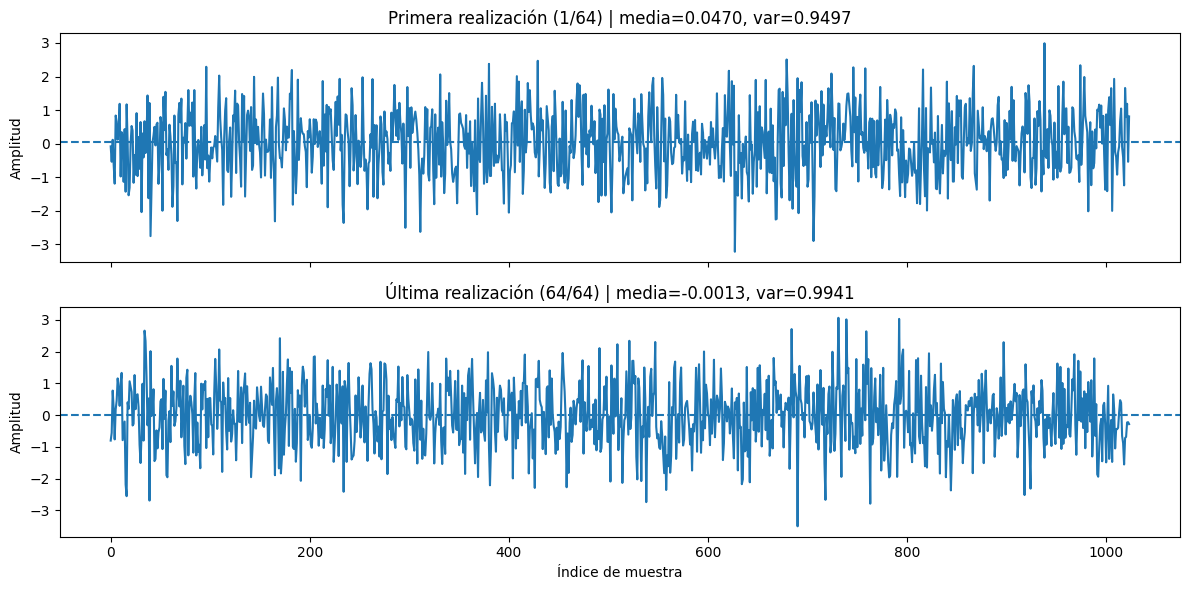

Media primera: 0.04704991355538368 Var primera: 0.9496921300888062
Media última : -0.0012945747002959251 Var última : 0.9941014647483826


In [2]:
import torch
import matplotlib.pyplot as plt

# -----------------------------
# Parámetros
# -----------------------------
N = 1024          # longitud de cada señal
M = 64            # número de realizaciones

# -----------------------------
# Generar 64 realizaciones: N(0,1)
# Forma: (M, N)
# -----------------------------
signals = torch.randn(M, N)

# Media y varianza estimadas de cada realización (opcional)
mean_est = signals.mean(dim=1)                 # (M,)
var_est = signals.var(dim=1, unbiased=True)    # (M,)

# -----------------------------
# Graficar: primera arriba, última abajo
# -----------------------------
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Primera señal (fila superior)
axes[0].plot(signals[0].numpy())
axes[0].axhline(mean_est[0].item(), linestyle="--")
axes[0].set_title(
    f"Primera realización (1/64) | media={mean_est[0].item():.4f}, var={var_est[0].item():.4f}"
)
axes[0].set_ylabel("Amplitud")

# Última señal (fila inferior)
axes[1].plot(signals[-1].numpy())
axes[1].axhline(mean_est[-1].item(), linestyle="--")
axes[1].set_title(
    f"Última realización (64/64) | media={mean_est[-1].item():.4f}, var={var_est[-1].item():.4f}"
)
axes[1].set_xlabel("Índice de muestra")
axes[1].set_ylabel("Amplitud")

plt.tight_layout()
plt.show()

# Si quieres ver medias/varianzas en consola:
print("Media primera:", mean_est[0].item(), "Var primera:", var_est[0].item())
print("Media última :", mean_est[-1].item(), "Var última :", var_est[-1].item())

In [5]:
import torch

# ---------------------------------
# Parámetros originales
# ---------------------------------
M = 64      # número de realizaciones
N = 1024    # longitud de cada señal

# Generar las 64 realizaciones gaussianas N(0,1)
signals = torch.randn(M, N)

# ---------------------------------
# 1. Seleccionar dos índices temporales aleatorios
# ---------------------------------
t_indices = torch.randint(0, N, (2,))
t1 = t_indices[0].item()
t2 = t_indices[1].item()

# ---------------------------------
# 2. Calcular media y varianza
#    (a lo largo del ensamble)
# ---------------------------------
mean_t1 = signals[:, t1].mean().item()
var_t1  = signals[:, t1].var(unbiased=True).item()

mean_t2 = signals[:, t2].mean().item()
var_t2  = signals[:, t2].var(unbiased=True).item()

# ---------------------------------
# 3. Mostrar resultados
# ---------------------------------
print("Primer índice temporal:", t1)
print("Media en t1:", round(mean_t1, 4))
print("Varianza en t1:", round(var_t1, 4))
print()

print("Segundo índice temporal:", t2)
print("Media en t2:", round(mean_t2, 4))
print("Varianza en t2:", round(var_t2, 4))

Primer índice temporal: 145
Media en t1: -0.0387
Varianza en t1: 1.1571

Segundo índice temporal: 582
Media en t2: -0.1756
Varianza en t2: 1.0076


Índice t1 = 307  -> media(t1) = -0.1367, var(t1) = 0.8462
Índice t2 = 869  -> media(t2) = 0.0714, var(t2) = 0.9397


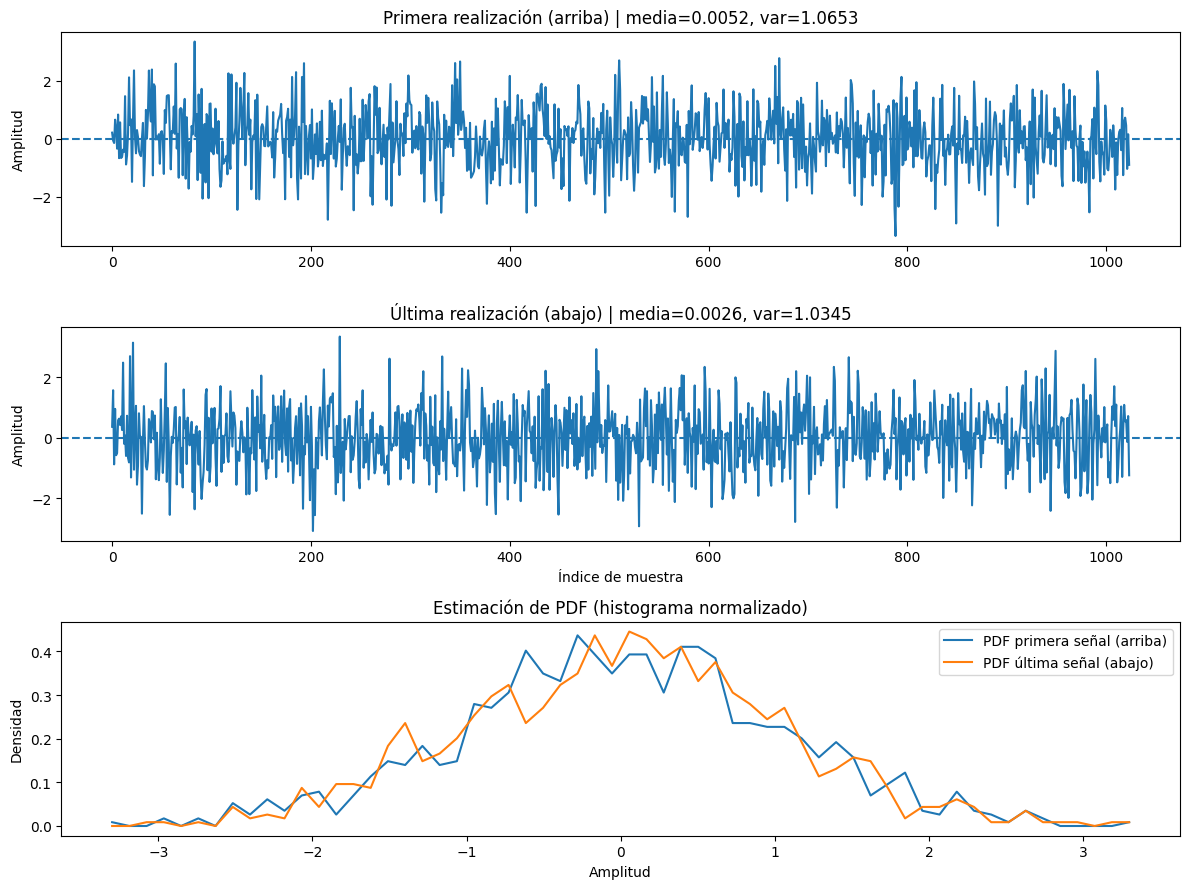


--- Estadísticos por ensamble en instantes aleatorios ---
t1=307: media=-0.1367, var=0.8462
t2=869: media=0.0714, var=0.9397


In [7]:
import torch
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1) Parámetros
# ------------------------------------------------------------
N = 1024     # longitud de cada señal
M = 64       # número de realizaciones (ensamble)

# ------------------------------------------------------------
# 2) Generar 64 realizaciones gaussianas N(0,1)
#    signals: (M, N)
# ------------------------------------------------------------
signals = torch.randn(M, N)

# Primera (superior) y última (inferior)
top = signals[0]
bottom = signals[-1]

# Media y varianza empíricas (por realización)
top_mean = top.mean().item()
top_var  = top.var(unbiased=True).item()
bot_mean = bottom.mean().item()
bot_var  = bottom.var(unbiased=True).item()

# ------------------------------------------------------------
# 3) Escoger 2 instantes aleatorios y calcular media/var
#    a lo largo de todas las realizaciones (ensamble)
# ------------------------------------------------------------
t_idx = torch.randint(0, N, (2,))
t1, t2 = t_idx[0].item(), t_idx[1].item()

mean_t1 = signals[:, t1].mean().item()
var_t1  = signals[:, t1].var(unbiased=True).item()

mean_t2 = signals[:, t2].mean().item()
var_t2  = signals[:, t2].var(unbiased=True).item()

print(f"Índice t1 = {t1}  -> media(t1) = {mean_t1:.4f}, var(t1) = {var_t1:.4f}")
print(f"Índice t2 = {t2}  -> media(t2) = {mean_t2:.4f}, var(t2) = {var_t2:.4f}")

# ------------------------------------------------------------
# 4) Estimar PDF de la primera y la última señal (hist densidad)
# ------------------------------------------------------------
bins = 60
top_hist, edges = torch.histogram(top, bins=bins, density=True)
bot_hist, _     = torch.histogram(bottom, bins=edges, density=True)  # mismos bins

centers = 0.5 * (edges[:-1] + edges[1:])

# ------------------------------------------------------------
# 5) Graficar:
#    Fila 1: primera señal
#    Fila 2: última señal
#    Fila 3: PDFs (mismo eje, colores distintos)
# ------------------------------------------------------------
fig, axes = plt.subplots(3, 1, figsize=(12, 9))

# Fila superior: primera señal
axes[0].plot(top.numpy())
axes[0].axhline(top_mean, linestyle="--")
axes[0].set_title(f"Primera realización (arriba) | media={top_mean:.4f}, var={top_var:.4f}")
axes[0].set_ylabel("Amplitud")

# Fila inferior: última señal (enunciado dice "fila inferior", aquí es la segunda fila)
axes[1].plot(bottom.numpy())
axes[1].axhline(bot_mean, linestyle="--")
axes[1].set_title(f"Última realización (abajo) | media={bot_mean:.4f}, var={bot_var:.4f}")
axes[1].set_ylabel("Amplitud")
axes[1].set_xlabel("Índice de muestra")

# Fila adicional: PDFs en la misma figura
axes[2].plot(centers.numpy(), top_hist.numpy(), label="PDF primera señal (arriba)")
axes[2].plot(centers.numpy(), bot_hist.numpy(), label="PDF última señal (abajo)")
axes[2].set_title("Estimación de PDF (histograma normalizado)")
axes[2].set_xlabel("Amplitud")
axes[2].set_ylabel("Densidad")
axes[2].legend()

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 6) Mostrar también los 4 valores solicitados en texto
# ------------------------------------------------------------
print("\n--- Estadísticos por ensamble en instantes aleatorios ---")
print(f"t1={t1}: media={mean_t1:.4f}, var={var_t1:.4f}")
print(f"t2={t2}: media={mean_t2:.4f}, var={var_t2:.4f}")

t1=183: media=-0.1429, var=0.6233
t2=778: media=-0.0876, var=0.7606


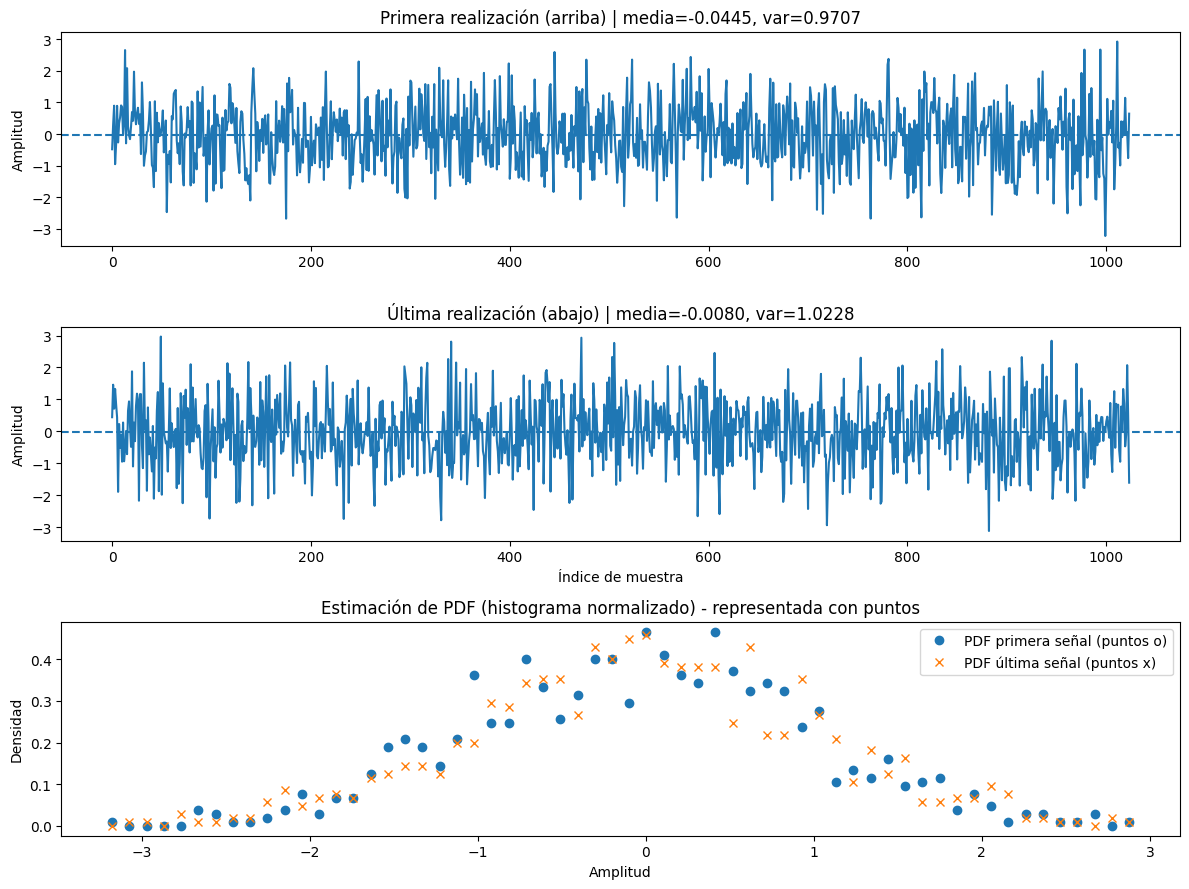


--- Estadísticos por ensamble en instantes aleatorios ---
t1=183: media=-0.1429, var=0.6233
t2=778: media=-0.0876, var=0.7606


In [8]:
import torch
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1) Parámetros
# ------------------------------------------------------------
N = 1024     # longitud de cada señal
M = 64       # número de realizaciones

# ------------------------------------------------------------
# 2) Generar 64 realizaciones gaussianas N(0,1): signals (M,N)
# ------------------------------------------------------------
signals = torch.randn(M, N)

top = signals[0]        # primera señal (fila superior)
bottom = signals[-1]    # última señal (fila inferior)

# Media y varianza empíricas de esas dos realizaciones
top_mean = top.mean().item()
top_var  = top.var(unbiased=True).item()
bot_mean = bottom.mean().item()
bot_var  = bottom.var(unbiased=True).item()

# ------------------------------------------------------------
# 3) Escoger 2 instantes aleatorios y calcular media/var
#    a lo largo del ensamble (todas las realizaciones)
# ------------------------------------------------------------
t_idx = torch.randint(0, N, (2,))
t1, t2 = t_idx[0].item(), t_idx[1].item()

mean_t1 = signals[:, t1].mean().item()
var_t1  = signals[:, t1].var(unbiased=True).item()
mean_t2 = signals[:, t2].mean().item()
var_t2  = signals[:, t2].var(unbiased=True).item()

print(f"t1={t1}: media={mean_t1:.4f}, var={var_t1:.4f}")
print(f"t2={t2}: media={mean_t2:.4f}, var={var_t2:.4f}")

# ------------------------------------------------------------
# 4) Estimar PDF (histograma normalizado) para primera y última señal
# ------------------------------------------------------------
bins = 60
top_hist, edges = torch.histogram(top, bins=bins, density=True)
bot_hist, _     = torch.histogram(bottom, bins=edges, density=True)  # mismos bins

centers = 0.5 * (edges[:-1] + edges[1:])  # centros de bins

# ------------------------------------------------------------
# 5) Gráficas:
#    Fila 1: primera señal
#    Fila 2: última señal
#    Fila 3: PDFs con "puntos" (markers), no líneas
# ------------------------------------------------------------
fig, axes = plt.subplots(3, 1, figsize=(12, 9))

# Fila superior: primera señal
axes[0].plot(top.numpy())
axes[0].axhline(top_mean, linestyle="--")
axes[0].set_title(f"Primera realización (arriba) | media={top_mean:.4f}, var={top_var:.4f}")
axes[0].set_ylabel("Amplitud")

# Fila inferior: última señal
axes[1].plot(bottom.numpy())
axes[1].axhline(bot_mean, linestyle="--")
axes[1].set_title(f"Última realización (abajo) | media={bot_mean:.4f}, var={bot_var:.4f}")
axes[1].set_ylabel("Amplitud")
axes[1].set_xlabel("Índice de muestra")

# PDFs con diferentes puntos (markers)
axes[2].plot(centers.numpy(), top_hist.numpy(), linestyle="None", marker="o",
             label="PDF primera señal (puntos o)")
axes[2].plot(centers.numpy(), bot_hist.numpy(), linestyle="None", marker="x",
             label="PDF última señal (puntos x)")
axes[2].set_title("Estimación de PDF (histograma normalizado) - representada con puntos")
axes[2].set_xlabel("Amplitud")
axes[2].set_ylabel("Densidad")
axes[2].legend()

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 6) Mostrar los 4 valores solicitados
# ------------------------------------------------------------
print("\n--- Estadísticos por ensamble en instantes aleatorios ---")
print(f"t1={t1}: media={mean_t1:.4f}, var={var_t1:.4f}")
print(f"t2={t2}: media={mean_t2:.4f}, var={var_t2:.4f}")

t1=223: media=-0.1277, var=1.0205
t2=309: media=-0.0796, var=1.2104


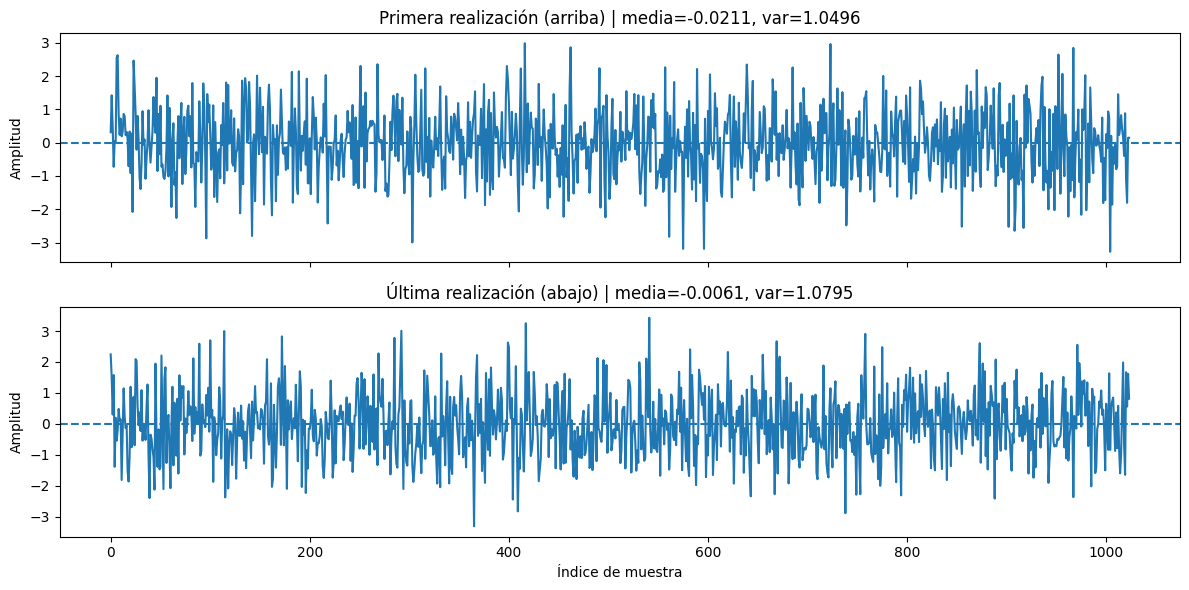

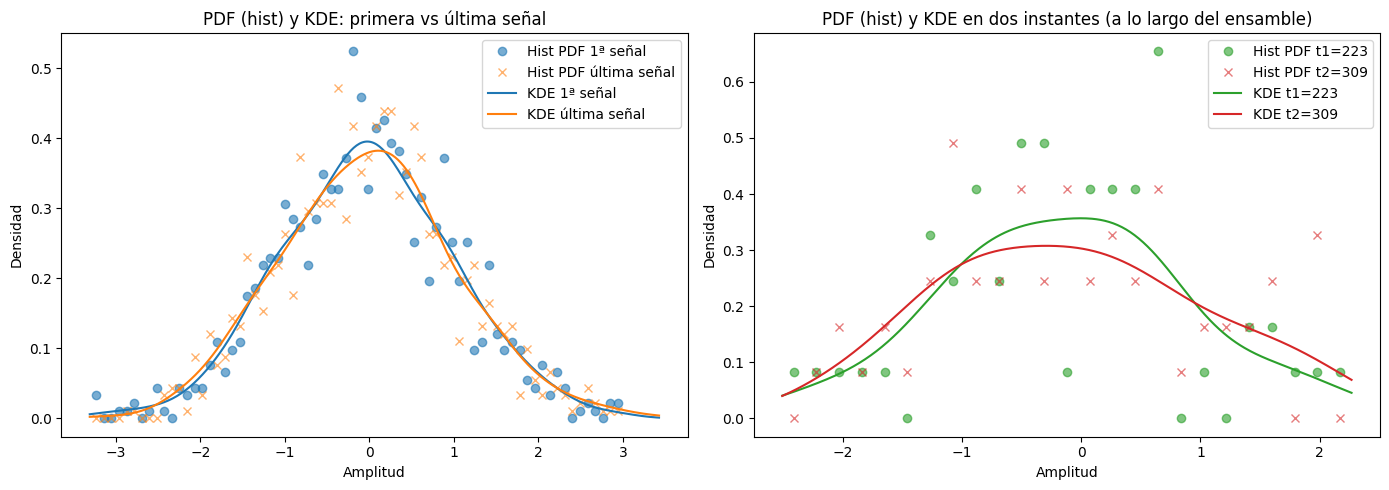


--- Estadísticos por ensamble en instantes aleatorios ---
t1=223: media=-0.1277, var=1.0205
t2=309: media=-0.0796, var=1.2104


In [9]:
import torch
import matplotlib.pyplot as plt
import math

# ============================================================
# 0) Parámetros (según enunciado)
# ============================================================
N = 1024   # longitud
M = 64     # realizaciones

# ============================================================
# 1) Generar 64 realizaciones gaussianas N(0,1)
#    signals tiene forma (M, N)
# ============================================================
signals = torch.randn(M, N)

top = signals[0]        # primera realización
bottom = signals[-1]    # última realización

# Media y varianza empíricas (por realización)
top_mean = top.mean().item()
top_var  = top.var(unbiased=True).item()
bot_mean = bottom.mean().item()
bot_var  = bottom.var(unbiased=True).item()

# ============================================================
# 2) Elegir 2 instantes aleatorios y calcular media/var
#    a lo largo del ensamble (todas las realizaciones)
# ============================================================
t_idx = torch.randint(0, N, (2,))
t1, t2 = int(t_idx[0].item()), int(t_idx[1].item())

x_t1 = signals[:, t1]  # valores en t1 (M muestras, una por realización)
x_t2 = signals[:, t2]  # valores en t2

mean_t1 = x_t1.mean().item()
var_t1  = x_t1.var(unbiased=True).item()
mean_t2 = x_t2.mean().item()
var_t2  = x_t2.var(unbiased=True).item()

print(f"t1={t1}: media={mean_t1:.4f}, var={var_t1:.4f}")
print(f"t2={t2}: media={mean_t2:.4f}, var={var_t2:.4f}")

# ============================================================
# 3) Funciones auxiliares: Histograma densidad + KDE (Gaussiano)
# ============================================================
def hist_density(samples: torch.Tensor, bins=60, edges=None):
    """
    Retorna (centers, density, edges) usando torch.histogram(density=True)
    Si edges se pasa, usa exactamente esos bins.
    """
    if edges is None:
        h, e = torch.histogram(samples, bins=bins, density=True)
    else:
        h, e = torch.histogram(samples, bins=edges, density=True)
    centers = 0.5 * (e[:-1] + e[1:])
    return centers, h, e

def silverman_bandwidth(samples: torch.Tensor):
    """
    Regla de Silverman para KDE gaussiano.
    h = 1.06 * std * n^{-1/5}
    """
    n = samples.numel()
    std = samples.std(unbiased=True)
    h = 1.06 * std * (n ** (-1/5))
    # Evitar h = 0 en casos degenerados
    return h if h > 0 else torch.tensor(1e-3, dtype=samples.dtype)

def gaussian_kde_1d(samples: torch.Tensor, grid: torch.Tensor, bandwidth=None):
    """
    KDE gaussiano 1D: f(x) = (1/(n*h*sqrt(2pi))) * sum exp(-(x-xi)^2/(2h^2))
    """
    samples = samples.flatten()
    n = samples.numel()
    if bandwidth is None:
        h = silverman_bandwidth(samples)
    else:
        h = torch.tensor(bandwidth, dtype=samples.dtype)

    # grid: (G,), samples: (n,) -> diff: (G,n)
    diff = (grid[:, None] - samples[None, :]) / h
    kernel_vals = torch.exp(-0.5 * diff**2) / (math.sqrt(2*math.pi) * h)
    return kernel_vals.mean(dim=1)  # promedio sobre n

# ============================================================
# 4) FIGURA 1: Señales (arriba primera, abajo última)
# ============================================================
fig1, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

ax[0].plot(top.numpy())
ax[0].axhline(top_mean, linestyle="--")
ax[0].set_title(f"Primera realización (arriba) | media={top_mean:.4f}, var={top_var:.4f}")
ax[0].set_ylabel("Amplitud")

ax[1].plot(bottom.numpy())
ax[1].axhline(bot_mean, linestyle="--")
ax[1].set_title(f"Última realización (abajo) | media={bot_mean:.4f}, var={bot_var:.4f}")
ax[1].set_xlabel("Índice de muestra")
ax[1].set_ylabel("Amplitud")

plt.tight_layout()
plt.show()

# ============================================================
# 5) FIGURA 2 (al lado): PDFs de (primera vs última) y (t1 vs t2)
#    + KDE sobre histograma
# ============================================================
fig2, ax2 = plt.subplots(1, 2, figsize=(14, 5))

# ----- (A) PDF primera y última señal (muestras: N=1024 cada una) -----
bins_sig = 70
c_top, h_top, edges_sig = hist_density(top, bins=bins_sig)
c_bot, h_bot, _         = hist_density(bottom, edges=edges_sig)

# Grid para KDE (usar rango común)
xmin = min(top.min().item(), bottom.min().item())
xmax = max(top.max().item(), bottom.max().item())
grid_sig = torch.linspace(xmin, xmax, 400)

kde_top = gaussian_kde_1d(top, grid_sig)
kde_bot = gaussian_kde_1d(bottom, grid_sig)

# Hist densidad (con alpha) + KDE (línea)
ax2[0].plot(c_top.numpy(), h_top.numpy(), marker="o", linestyle="None", label="Hist PDF 1ª señal", color="tab:blue", alpha=0.6)
ax2[0].plot(c_bot.numpy(), h_bot.numpy(), marker="x", linestyle="None", label="Hist PDF última señal", color="tab:orange", alpha=0.6)

ax2[0].plot(grid_sig.numpy(), kde_top.numpy(), label="KDE 1ª señal", color="tab:blue")
ax2[0].plot(grid_sig.numpy(), kde_bot.numpy(), label="KDE última señal", color="tab:orange")

ax2[0].set_title("PDF (hist) y KDE: primera vs última señal")
ax2[0].set_xlabel("Amplitud")
ax2[0].set_ylabel("Densidad")
ax2[0].legend()

# ----- (B) PDF en t1 y t2 (muestras: M=64 cada una, a lo largo del ensamble) -----
bins_t = 25
c_t1, h_t1, edges_t = hist_density(x_t1, bins=bins_t)
c_t2, h_t2, _       = hist_density(x_t2, edges=edges_t)

xmin_t = min(x_t1.min().item(), x_t2.min().item())
xmax_t = max(x_t1.max().item(), x_t2.max().item())
grid_t = torch.linspace(xmin_t, xmax_t, 400)

kde_t1 = gaussian_kde_1d(x_t1, grid_t)
kde_t2 = gaussian_kde_1d(x_t2, grid_t)

ax2[1].plot(c_t1.numpy(), h_t1.numpy(), marker="o", linestyle="None",
           label=f"Hist PDF t1={t1}", color="tab:green", alpha=0.6)
ax2[1].plot(c_t2.numpy(), h_t2.numpy(), marker="x", linestyle="None",
           label=f"Hist PDF t2={t2}", color="tab:red", alpha=0.6)

ax2[1].plot(grid_t.numpy(), kde_t1.numpy(), label=f"KDE t1={t1}", color="tab:green")
ax2[1].plot(grid_t.numpy(), kde_t2.numpy(), label=f"KDE t2={t2}", color="tab:red")

ax2[1].set_title("PDF (hist) y KDE en dos instantes (a lo largo del ensamble)")
ax2[1].set_xlabel("Amplitud")
ax2[1].set_ylabel("Densidad")
ax2[1].legend()

plt.tight_layout()
plt.show()

# ============================================================
# 6) Mostrar los 4 valores solicitados (media/var en t1 y t2)
# ============================================================
print("\n--- Estadísticos por ensamble en instantes aleatorios ---")
print(f"t1={t1}: media={mean_t1:.4f}, var={var_t1:.4f}")
print(f"t2={t2}: media={mean_t2:.4f}, var={var_t2:.4f}")


t1=289: media=0.0090, var=0.9338
t2=272: media=0.1993, var=0.8953


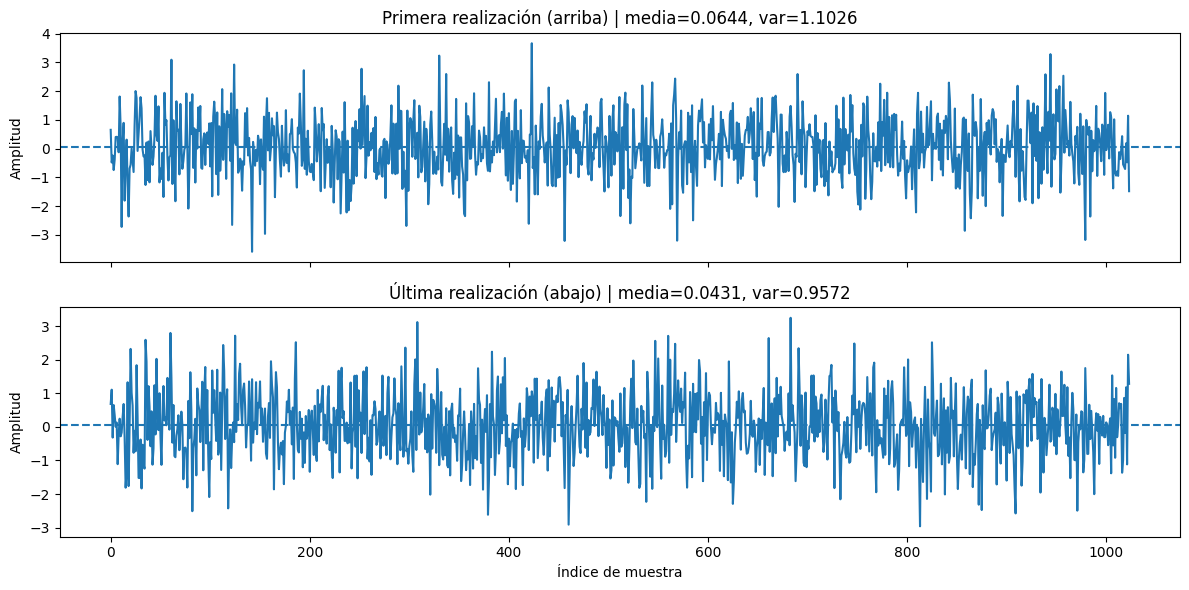

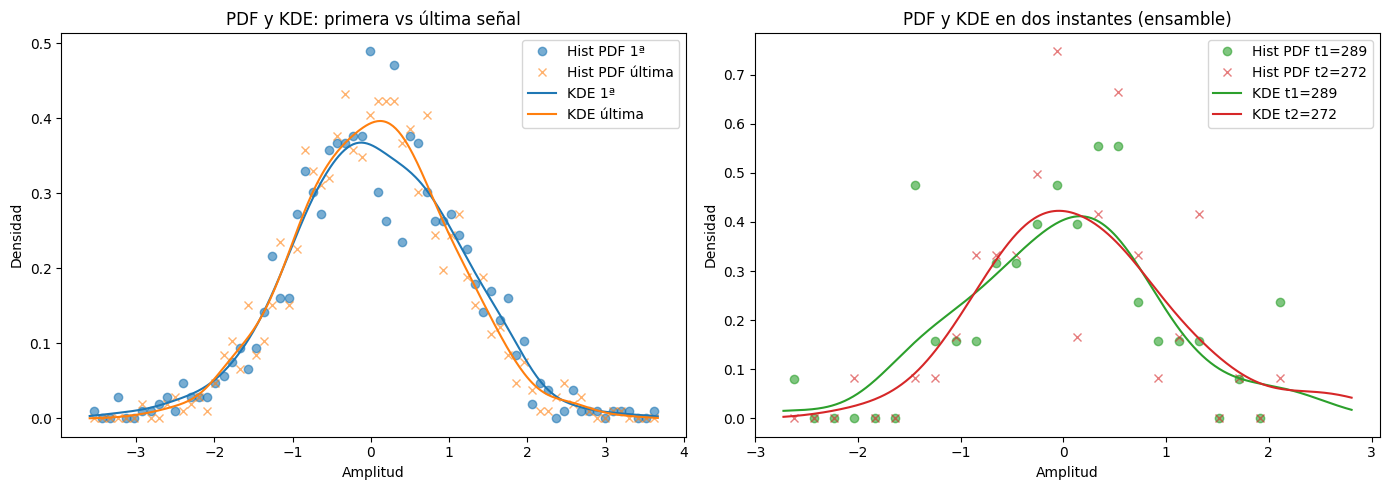


--- Prueba de gaussianidad (Jarque–Bera, alpha=0.05) ---
Instantes que ACEPTAN gaussianidad: 862 de 1024
Instantes que RECHAZAN gaussianidad: 162 de 1024


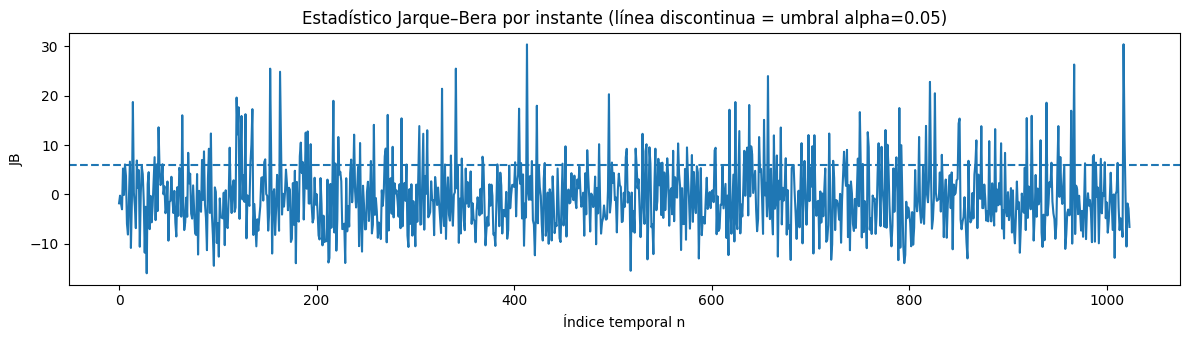

In [10]:
import torch
import matplotlib.pyplot as plt
import math

# ============================================================
# 1) Parámetros
# ============================================================
N = 1024  # longitud
M = 64    # realizaciones
alpha = 0.05  # nivel de significancia para prueba de gaussianidad

# ============================================================
# 2) Generar 64 realizaciones gaussianas N(0,1)
#    signals: (M, N)
# ============================================================
signals = torch.randn(M, N)

top = signals[0]        # primera señal
bottom = signals[-1]    # última señal

top_mean = top.mean().item()
top_var  = top.var(unbiased=True).item()
bot_mean = bottom.mean().item()
bot_var  = bottom.var(unbiased=True).item()

# ============================================================
# 3) Elegir 2 instantes aleatorios y estadísticos por ensamble
# ============================================================
t_idx = torch.randint(0, N, (2,))
t1, t2 = int(t_idx[0].item()), int(t_idx[1].item())

x_t1 = signals[:, t1]   # 64 valores en t1 (uno por realización)
x_t2 = signals[:, t2]   # 64 valores en t2

mean_t1 = x_t1.mean().item()
var_t1  = x_t1.var(unbiased=True).item()
mean_t2 = x_t2.mean().item()
var_t2  = x_t2.var(unbiased=True).item()

print(f"t1={t1}: media={mean_t1:.4f}, var={var_t1:.4f}")
print(f"t2={t2}: media={mean_t2:.4f}, var={var_t2:.4f}")

# ============================================================
# 4) Histograma densidad + KDE (Gaussiano, Silverman)
# ============================================================
def hist_density(samples: torch.Tensor, bins=60, edges=None):
    if edges is None:
        h, e = torch.histogram(samples, bins=bins, density=True)
    else:
        h, e = torch.histogram(samples, bins=edges, density=True)
    centers = 0.5 * (e[:-1] + e[1:])
    return centers, h, e

def silverman_bandwidth(samples: torch.Tensor):
    n = samples.numel()
    std = samples.std(unbiased=True)
    h = 1.06 * std * (n ** (-1/5))
    return h if h > 0 else torch.tensor(1e-3, dtype=samples.dtype)

def gaussian_kde_1d(samples: torch.Tensor, grid: torch.Tensor, bandwidth=None):
    samples = samples.flatten()
    n = samples.numel()
    h = silverman_bandwidth(samples) if bandwidth is None else torch.tensor(bandwidth, dtype=samples.dtype)

    diff = (grid[:, None] - samples[None, :]) / h
    kernel = torch.exp(-0.5 * diff**2) / (math.sqrt(2*math.pi) * h)
    return kernel.mean(dim=1)

# ============================================================
# 5) FIGURA A: primera arriba, última abajo (con media/var)
# ============================================================
figA, axA = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

axA[0].plot(top.numpy())
axA[0].axhline(top_mean, linestyle="--")
axA[0].set_title(f"Primera realización (arriba) | media={top_mean:.4f}, var={top_var:.4f}")
axA[0].set_ylabel("Amplitud")

axA[1].plot(bottom.numpy())
axA[1].axhline(bot_mean, linestyle="--")
axA[1].set_title(f"Última realización (abajo) | media={bot_mean:.4f}, var={bot_var:.4f}")
axA[1].set_xlabel("Índice de muestra")
axA[1].set_ylabel("Amplitud")

plt.tight_layout()
plt.show()

# ============================================================
# 6) FIGURA B: PDFs + KDE en dos paneles (lado a lado)
#    - Izquierda: PDF(top) vs PDF(bottom)
#    - Derecha:  PDF(t1) vs PDF(t2) (ensamble)
# ============================================================
figB, axB = plt.subplots(1, 2, figsize=(14, 5))

# --- Izquierda: primera vs última señal (N=1024 muestras cada una)
bins_sig = 70
c_top, h_top, edges_sig = hist_density(top, bins=bins_sig)
c_bot, h_bot, _         = hist_density(bottom, edges=edges_sig)

xmin = min(top.min().item(), bottom.min().item())
xmax = max(top.max().item(), bottom.max().item())
grid_sig = torch.linspace(xmin, xmax, 400)

kde_top = gaussian_kde_1d(top, grid_sig)
kde_bot = gaussian_kde_1d(bottom, grid_sig)

axB[0].plot(c_top.numpy(), h_top.numpy(), marker="o", linestyle="None", alpha=0.6, label="Hist PDF 1ª", color="tab:blue")
axB[0].plot(c_bot.numpy(), h_bot.numpy(), marker="x", linestyle="None", alpha=0.6, label="Hist PDF última", color="tab:orange")
axB[0].plot(grid_sig.numpy(), kde_top.numpy(), label="KDE 1ª", color="tab:blue")
axB[0].plot(grid_sig.numpy(), kde_bot.numpy(), label="KDE última", color="tab:orange")
axB[0].set_title("PDF y KDE: primera vs última señal")
axB[0].set_xlabel("Amplitud")
axB[0].set_ylabel("Densidad")
axB[0].legend()

# --- Derecha: PDFs en t1 y t2 (M=64 muestras cada una)
bins_t = 25
c_t1, h1, edges_t = hist_density(x_t1, bins=bins_t)
c_t2, h2, _       = hist_density(x_t2, edges=edges_t)

xmin_t = min(x_t1.min().item(), x_t2.min().item())
xmax_t = max(x_t1.max().item(), x_t2.max().item())
grid_t = torch.linspace(xmin_t, xmax_t, 400)

kde_t1 = gaussian_kde_1d(x_t1, grid_t)
kde_t2 = gaussian_kde_1d(x_t2, grid_t)

axB[1].plot(c_t1.numpy(), h1.numpy(), marker="o", linestyle="None", alpha=0.6, label=f"Hist PDF t1={t1}", color="tab:green")
axB[1].plot(c_t2.numpy(), h2.numpy(), marker="x", linestyle="None", alpha=0.6, label=f"Hist PDF t2={t2}", color="tab:red")
axB[1].plot(grid_t.numpy(), kde_t1.numpy(), label=f"KDE t1={t1}", color="tab:green")
axB[1].plot(grid_t.numpy(), kde_t2.numpy(), label=f"KDE t2={t2}", color="tab:red")
axB[1].set_title("PDF y KDE en dos instantes (ensamble)")
axB[1].set_xlabel("Amplitud")
axB[1].set_ylabel("Densidad")
axB[1].legend()

plt.tight_layout()
plt.show()

# ============================================================
# 7) Prueba de gaussianidad en CADA instante (n = 0..1023)
#    Usamos Jarque–Bera (JB) y comparamos contra chi-cuadrado df=2.
#    Si NO tienes SciPy, usamos el valor crítico:
#      chi2_{0.95, df=2} = 5.991 (para alpha=0.05)
# ============================================================
CHI2_CRIT_DF2 = 5.991  # para alpha=0.05 y df=2 (aprox)

def jarque_bera_stat(x: torch.Tensor):
    """
    JB = n/6 * (S^2 + (K-3)^2 / 4)
    S = skewness muestral, K = kurtosis muestral (no excesiva)
    """
    x = x.flatten()
    n = x.numel()
    mu = x.mean()
    centered = x - mu
    m2 = (centered**2).mean()
    m3 = (centered**3).mean()
    m4 = (centered**4).mean()

    # Evitar división por cero
    if m2.item() == 0.0:
        return torch.tensor(0.0)

    S = m3 / (m2 ** 1.5)
    K = m4 / (m2 ** 2)
    JB = (n / 6.0) * (S*2 + ((K - 3.0)*2) / 4.0)
    return JB

accepted = 0
JB_vals = torch.empty(N)

for n in range(N):
    jb = jarque_bera_stat(signals[:, n])
    JB_vals[n] = jb
    if jb.item() < CHI2_CRIT_DF2:
        accepted += 1

print("\n--- Prueba de gaussianidad (Jarque–Bera, alpha=0.05) ---")
print(f"Instantes que ACEPTAN gaussianidad: {accepted} de {N}")
print(f"Instantes que RECHAZAN gaussianidad: {N - accepted} de {N}")

# (Opcional) Visualizar JB a lo largo del tiempo y el umbral
plt.figure(figsize=(12, 3.5))
plt.plot(JB_vals.numpy())
plt.axhline(CHI2_CRIT_DF2, linestyle="--")
plt.title("Estadístico Jarque–Bera por instante (línea discontinua = umbral alpha=0.05)")
plt.xlabel("Índice temporal n")
plt.ylabel("JB")
plt.tight_layout()
plt.show()


Instante t1=21: media=-0.0008, var=0.9761
Instante t2=430: media=-0.0065, var=0.6613


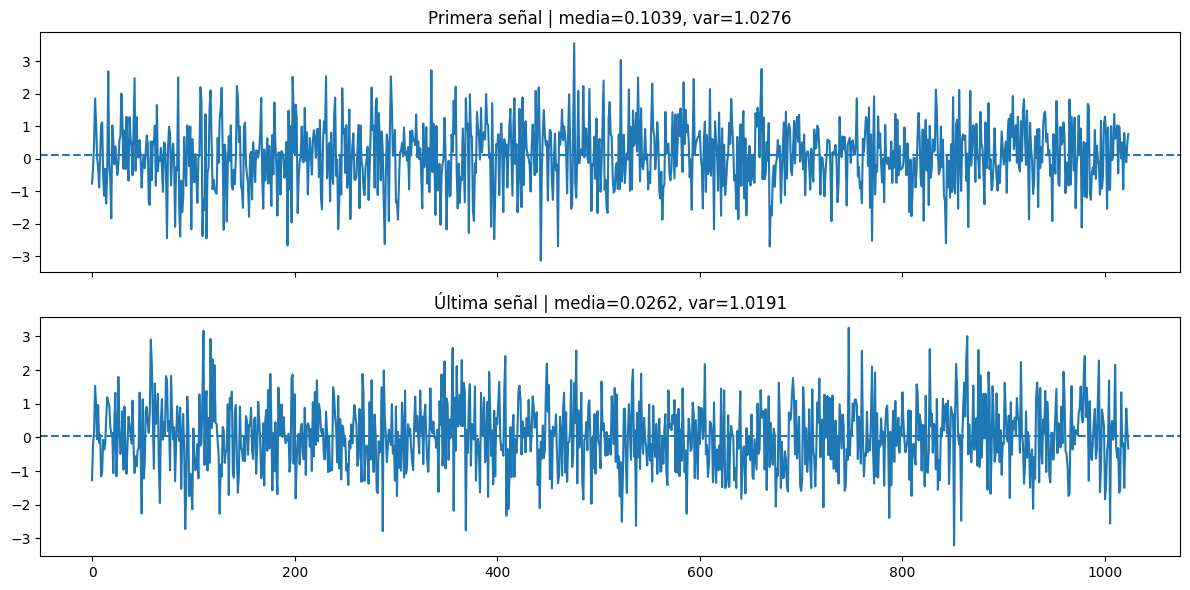

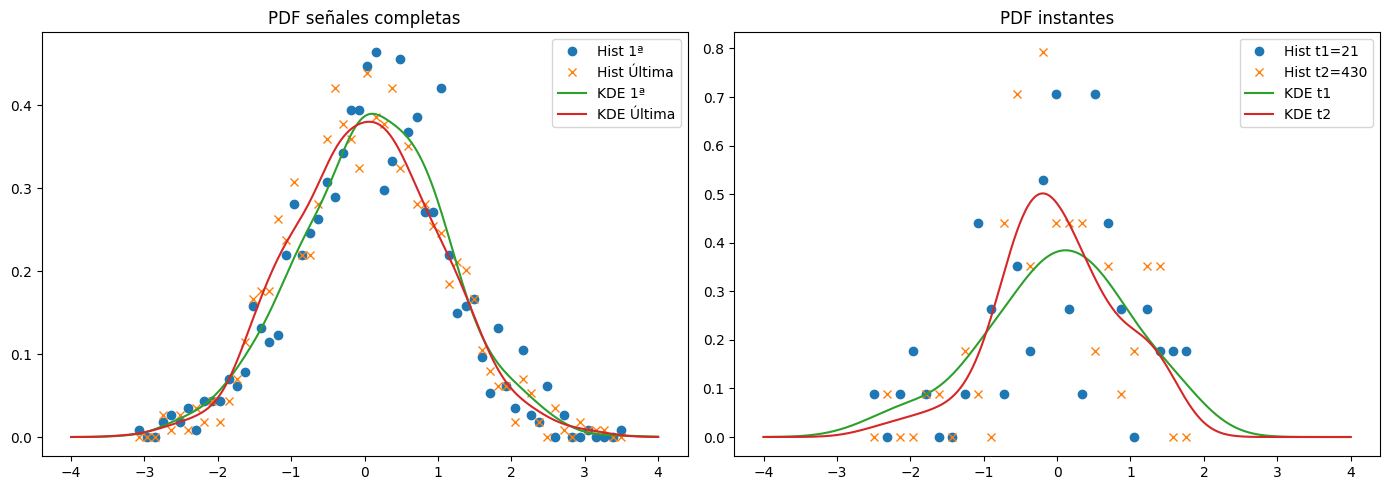


Gaussianidad aceptada en: 989 de 1024 instantes


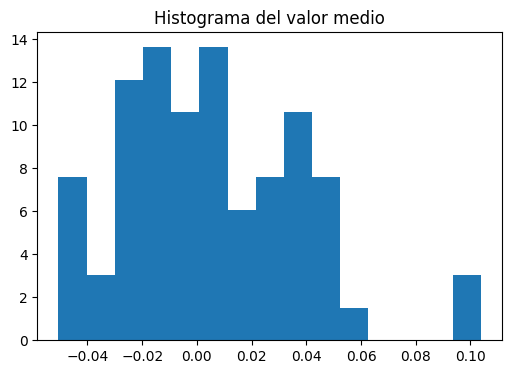


Esperanza empírica del valor medio: 0.00523
Varianza de los valores medios: 0.001077

Promedio temporal global: 0.00523
Promedio de ensamble global: 0.00523

Conclusión: El proceso es ergódico en media.


In [12]:
import torch
import matplotlib.pyplot as plt
import math

# ============================================================
# 1) Parámetros
# ============================================================
N = 1024
M = 64
alpha = 0.05
CHI2_CRIT_DF2 = 5.991  # chi2(2,0.95)

# ============================================================
# 2) Generación del proceso Gaussiano N(0,1)
# ============================================================
signals = torch.randn(M, N)

top = signals[0]
bottom = signals[-1]

top_mean = top.mean().item()
top_var  = top.var(unbiased=True).item()
bot_mean = bottom.mean().item()
bot_var  = bottom.var(unbiased=True).item()

# ============================================================
# 3) Dos instantes aleatorios
# ============================================================
t_idx = torch.randint(0, N, (2,))
t1, t2 = int(t_idx[0]), int(t_idx[1])

x_t1 = signals[:, t1]
x_t2 = signals[:, t2]

mean_t1 = x_t1.mean().item()
var_t1  = x_t1.var(unbiased=True).item()
mean_t2 = x_t2.mean().item()
var_t2  = x_t2.var(unbiased=True).item()

print(f"\nInstante t1={t1}: media={mean_t1:.4f}, var={var_t1:.4f}")
print(f"Instante t2={t2}: media={mean_t2:.4f}, var={var_t2:.4f}")

# ============================================================
# 4) Funciones Histograma + KDE
# ============================================================
def hist_density(samples, bins=60, edges=None):
    if edges is None:
        h, e = torch.histogram(samples, bins=bins, density=True)
    else:
        h, e = torch.histogram(samples, bins=edges, density=True)
    centers = 0.5*(e[:-1]+e[1:])
    return centers, h, e

def silverman(samples):
    n = samples.numel()
    std = samples.std(unbiased=True)
    return 1.06 * std * (n**(-1/5))

def kde_gauss(samples, grid):
    samples = samples.flatten()
    h = silverman(samples)
    diff = (grid[:,None] - samples[None,:]) / h
    kernel = torch.exp(-0.5*diff**2)/(math.sqrt(2*math.pi)*h)
    return kernel.mean(dim=1)

# ============================================================
# 5) FIGURA 1: Primera y Última señal
# ============================================================
fig1, ax1 = plt.subplots(2,1, figsize=(12,6), sharex=True)

ax1[0].plot(top.numpy())
ax1[0].axhline(top_mean, linestyle='--')
ax1[0].set_title(f"Primera señal | media={top_mean:.4f}, var={top_var:.4f}")

ax1[1].plot(bottom.numpy())
ax1[1].axhline(bot_mean, linestyle='--')
ax1[1].set_title(f"Última señal | media={bot_mean:.4f}, var={bot_var:.4f}")

plt.tight_layout()
plt.show()

# ============================================================
# 6) FIGURA 2: PDFs + KDE
# ============================================================
fig2, ax2 = plt.subplots(1,2, figsize=(14,5))

# Señales completas
c_top, h_top, edges = hist_density(top)
c_bot, h_bot, _     = hist_density(bottom, edges=edges)

grid = torch.linspace(-4,4,400)
kde_top = kde_gauss(top, grid)
kde_bot = kde_gauss(bottom, grid)

ax2[0].plot(c_top.numpy(), h_top.numpy(), 'o', label="Hist 1ª")
ax2[0].plot(c_bot.numpy(), h_bot.numpy(), 'x', label="Hist Última")
ax2[0].plot(grid.numpy(), kde_top.numpy(), label="KDE 1ª")
ax2[0].plot(grid.numpy(), kde_bot.numpy(), label="KDE Última")
ax2[0].set_title("PDF señales completas")
ax2[0].legend()

# Instantes
c1, h1, edges2 = hist_density(x_t1, bins=25)
c2, h2, _      = hist_density(x_t2, edges=edges2)

grid2 = torch.linspace(-4,4,400)
kde1 = kde_gauss(x_t1, grid2)
kde2 = kde_gauss(x_t2, grid2)

ax2[1].plot(c1.numpy(), h1.numpy(), 'o', label=f"Hist t1={t1}")
ax2[1].plot(c2.numpy(), h2.numpy(), 'x', label=f"Hist t2={t2}")
ax2[1].plot(grid2.numpy(), kde1.numpy(), label="KDE t1")
ax2[1].plot(grid2.numpy(), kde2.numpy(), label="KDE t2")
ax2[1].set_title("PDF instantes")
ax2[1].legend()

plt.tight_layout()
plt.show()

# ============================================================
# 7) Prueba de Gaussianidad (Jarque-Bera)
# ============================================================
def jarque_bera(x):
    n = x.numel()
    mu = x.mean()
    c = x - mu
    m2 = (c**2).mean()
    m3 = (c**3).mean()
    m4 = (c**4).mean()
    S = m3/(m2**1.5)
    K = m4/(m2**2)
    JB = (n/6)*(S**2 + ((K-3)**2)/4)
    return JB

accepted = 0
for n in range(N):
    if jarque_bera(signals[:,n]) < CHI2_CRIT_DF2:
        accepted += 1

print("\nGaussianidad aceptada en:", accepted, "de", N, "instantes")

# ============================================================
# 8) Histograma del valor medio (ergodicidad)
# ============================================================
means_real = signals.mean(dim=1)

plt.figure(figsize=(6,4))
plt.hist(means_real.numpy(), bins=15, density=True)
plt.title("Histograma del valor medio")
plt.show()

E_media = means_real.mean().item()
Var_media = means_real.var(unbiased=True).item()

print("\nEsperanza empírica del valor medio:", round(E_media,5))
print("Varianza de los valores medios:", round(Var_media,6))

# ============================================================
# 9) Verificación de ergodicidad
# ============================================================
# Promedio temporal global
mean_time_global = signals.mean(dim=1).mean().item()

# Promedio de ensamble global
mean_ensemble_global = signals.mean(dim=0).mean().item()

print("\nPromedio temporal global:", round(mean_time_global,5))
print("Promedio de ensamble global:", round(mean_ensemble_global,5))

if abs(mean_time_global - mean_ensemble_global) < 0.05:
    print("\nConclusión: El proceso es ergódico en media.")
else:
    print("\nConclusión: No se verifica ergodicidad en media.")
